# Uma breve exposição sobre o SageMath

***
Rogério T. Cavalcanti

> SageMath is a **free open-source mathematics software system** licensed under the GPL. It builds on top of many existing open-source packages: NumPy, SciPy, matplotlib, Sympy, Maxima, GAP, FLINT, R and many more. You can access their combined power through a common, Python-based language or directly via interfaces or wrappers.

> Mission: *Creating a viable free open source alternative to Magma, Maple, Mathematica and Matlab.*

www.sagemath.org

## Interface

- Jupyter
- Markdown
- Latex

## Pré-documento

Usamos `%display latex` para exibir as expreções como no $\LaTeX{}$

In [1]:
%display latex # outras opções são plane, ascii_art e unicode_art

In [2]:
reset() #inicializa todas as variáveis

## 1 Algumas funcionalidades básicas

### 1.1 Operações básicas

Frações e raízes são automaticamente simplificadas

In [3]:
15/25

3/5

In [4]:
sqrt(20)

2*sqrt(5)

In [5]:
sqrt(20).n()

4.47213595499958

In [6]:
floor(sqrt(20))

4

Algumas operações e funções básicas do Sage:

|Operação|Sintáxe|
|:-:|:-:|
|4 operações | `a+b, a-b, a*b, a/b`|
|Potêmcia | `a**b ou a^b`|
|Raiz quadrada | `sqrt(a)`|
|Divisão inteira | `a//b`|
|Resto na divisão | `a%b`|
|Fatorial | `factorial(a)`|
|Coeficiente binômial $\begin{pmatrix} a\\ b\end{pmatrix}$ | `binomial(a,b)`|
|Parte inteira | `floor(a)`|
|Valor absoluto | `abs(a)`|
|Número em formato ponto flutuante | `N(a) ou a.n()`|

### 1.2 Variáveis simbólicas

Existem dois tipos básicos de variáveis no sage:

* As variáveis simbólicas, usadas nos cálculos simbólicos;

* Variáveis python, que são usadas para guardas alguma informação na memória. 

Variáveis simbólicas precisam ser declaradas. Exceto `x`, que já é pré declarada.

In [7]:
var('u w a b') 

(u, w, a, b)

Uma lista de varáveis simbólicas indexadas pode ser criada com:

In [8]:
X = SR.var('x',4) #SR -> Symbolic Ring
X

(x0, x1, x2, x3)

In [10]:
X[3]

x3

Variáveis simbólicas são usadas, por exemplo, para declarar funções.

In [11]:
f(u)=cos(u)^6 + sin(u)^6 + 3 * sin(u)^2 * cos(u)^2
f

u |--> cos(u)^6 + sin(u)^6 + 3*cos(u)^2*sin(u)^2

Assim como em python, se você digitar `.` após o nome de um objeto e apertar a tecla Tab será exibda uma lista de métodos associados a este objeto.

In [13]:
f.integrate(u)

u |--> u

Um `?` após o nome de uma função exibe uma descrição da função, geralmente com alguns exemplos.

In [15]:
plot??

Código $\LaTeX$

In [16]:
print(latex(f(u)))

\cos\left(u\right)^{6} + \sin\left(u\right)^{6} + 3 \, \cos\left(u\right)^{2} \sin\left(u\right)^{2}


### 1.3 Derivadas

In [17]:
diff(sin(x^2),x)

2*x*cos(x^2)

de ordem superior

In [18]:
diff(sin(x^2), x,3)

-8*x^3*cos(x^2) - 12*x*sin(x^2)

parcial

In [19]:
h(x,y) = x*y^2 + sin(x^2) + e^(-x); h(x,y)

x*y^2 + e^(-x) + sin(x^2)

In [20]:
derivative(h(x,y), x)

y^2 + 2*x*cos(x^2) - e^(-x)

In [21]:
diff(h(x,y), y)

2*x*y

### 1.4 Integrais

In [24]:
(1/(1+x^2)).integral(x, -infinity, infinity,hold=True)

integrate(1/(x^2 + 1), x, -Infinity, +Infinity)

In [25]:
(1/(1+x^2)).integral(x, -oo, oo)

pi

In [26]:
var('G M r c')
integrate(1-2*G*M/(c^2*r), r)

r - 2*G*M*log(r)/c^2

In [27]:
diff(_,r)

-2*G*M/(c^2*r) + 1

### 1.5 Integração numérica

Para calcular numericamente uma integral usamos a função `integral_numerical`.

Essa função  retorna um par: 

   * o primeiro valor é a aproximação da integral;

   * o segundo uma estimativa do erro correspondente.

In [28]:
integral_numerical(sin(x)/x, 0, 1)

(0.946083070367183, 1.0503632079297087e-14)

In [29]:
integrate(sin(x)/x,x, 0, 1).n()

0.946083070367183

### 1.6 Séries de Taylor

In [30]:
taylor(exp(x), x, 0, 5)

1/120*x^5 + 1/24*x^4 + 1/6*x^3 + 1/2*x^2 + x + 1

Função | Sintáxe
:-- |:--
Limite | `lim(f(x),x=a)` ou `limit(f(x),x=a)`
Derivada | `diff(f(x), x)` ou `f(x).diff()`
n-ésima derivada | `diff(f(x), x, n)`
Integral indefinida | `integrate(f(x), x)`
Integral definida | `integrate(f(x), x, lim_inf, lim_sup)`
Integral numérica | `integral_numerical(f(x), lim_inf, lim_sup)`
Série de Taylor | `taylor(f(x), x, x_0, ordem)`

## 2. Equações diferenciais

### 2.1 EDOs

In [31]:
f=function('f')(u);f

f(u)

In [32]:
ed_1 = diff(f,u) == (cos(f)-2*u)/(f+u*sin(f)); ed_1

diff(f(u), u) == -(2*u - cos(f(u)))/(u*sin(f(u)) + f(u))

In [34]:
ed_1.lhs()

diff(f(u), u)

In [35]:
y = var('y');

In [36]:
ed_1.rhs().subs({f(u):y})

-(2*u - cos(y))/(u*sin(y) + y)

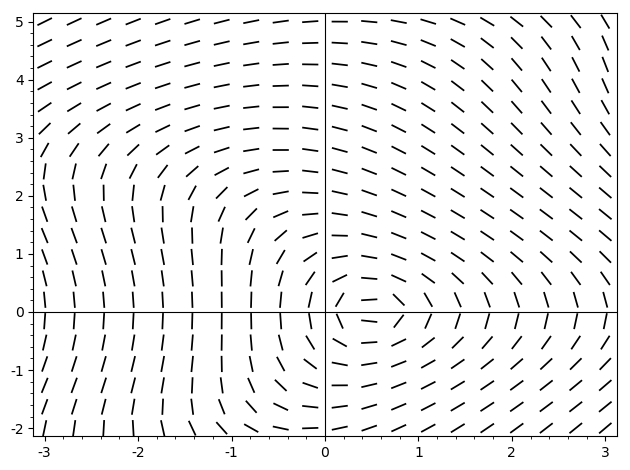

In [37]:
tang = plot_slope_field(ed_1.rhs().subs({f(u):y}), (u,-3,3), (y,-2,5)); tang   

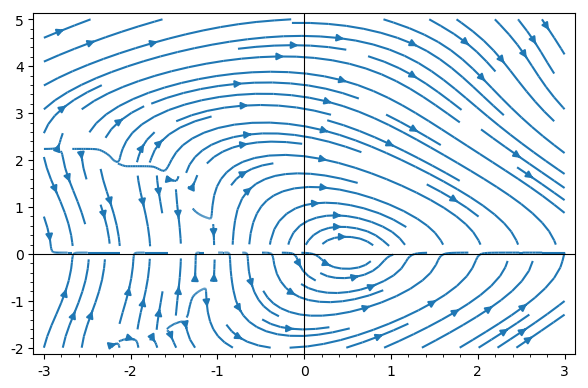

In [38]:
fluxo = streamline_plot(ed_1.rhs().subs({f(u):y}), (u,-3,3), (y,-2,5)); fluxo

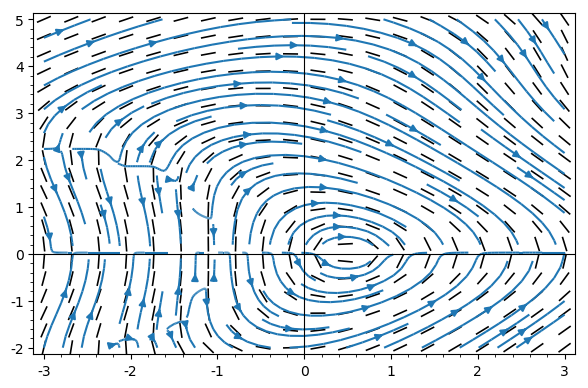

In [39]:
tang+fluxo

In [40]:
desolve(ed_1, f, show_method=True)

[u^2 - u*cos(f(u)) + 1/2*f(u)^2 == _C, 'exact']

In [41]:
desolve(ed_1, f)

u^2 - u*cos(f(u)) + 1/2*f(u)^2 == _C

### 2.2 Equação do calor 1D

$$\frac{\partial^{2}T\left(t, x\right)}{\partial x^{2}} = \frac{\partial}{\partial t}T\left(t,x\right)$$

Condições de contorno (Dirichlet)

$$x\in (0,\ell);\quad T(t,0)=u_0(t); \quad T(t,\ell)=u_\ell(t);\quad T(0,x)=v(x);$$

In [42]:
x, t = var('x, t'); f = function('f')(x); g = function('g')(t)

In [43]:
ell = var('ell', latex_name=r'\ell')

In [44]:
ell

ell

In [45]:
t_0 = var('t_0')
u_0 = var('u_0')
u_ell = var('u_ell', latex_name = r'u_\ell')
v = var('v')

In [46]:
T = function('T')(x,t)

In [47]:
diff(T,x,2) == diff(T,t)

diff(T(x, t), x, x) == diff(T(x, t), t)

Separação de variáveis $T(x,t) = f(x)g(t)$

In [48]:
T=f*g

In [49]:
eq_calor = diff(T,x,2) == diff(T,t); 

In [50]:
eq_calor

g(t)*diff(f(x), x, x) == f(x)*diff(g(t), t)

In [51]:
eq_calor = eq_calor/T

In [52]:
eq_calor

diff(f(x), x, x)/f(x) == diff(g(t), t)/g(t)

In [53]:
k_n = var('k_n', domain = 'real')

In [54]:
eq_calor_f = eq_calor.lhs()==-k_n^2

In [55]:
eq_calor_g = eq_calor.rhs()==-k_n^2

In [56]:
eq_calor_f

diff(f(x), x, x)/f(x) == -k_n^2

Solução

In [57]:
desolve(eq_calor_g,[g,t])

_C*e^(-k_n^2*t)

Com condições de contorno

In [58]:
sol_g = desolve(eq_calor_g,[g,t],ics=[0,v]);sol_g

v*e^(-k_n^2*t)

In [59]:
assume(k_n>0)
desolve(eq_calor_f,[f,x])

_K2*cos(k_n*x) + _K1*sin(k_n*x)

In [60]:
sol_f = desolve(eq_calor_f,[f,x],ics=[0,u_0,ell,u_ell]); sol_f

u_0*cos(k_n*x) - (u_0*cos(ell*k_n) - u_ell)*sin(k_n*x)/sin(ell*k_n)

In [61]:
sol_T = (sol_g*sol_f);sol_T

(u_0*cos(k_n*x) - (u_0*cos(ell*k_n) - u_ell)*sin(k_n*x)/sin(ell*k_n))*v*e^(-k_n^2*t)

In [62]:
(sol_T.diff(x,2)-sol_T.diff(t)).expand()

0

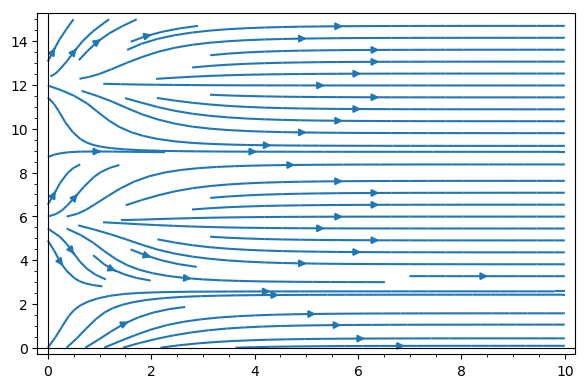

In [63]:
fluxo1 = streamline_plot(sol_T.subs(v=1,k_n=1,u_0=3,u_ell=1,ell=15), (t,0,10), (x,0,15));fluxo1

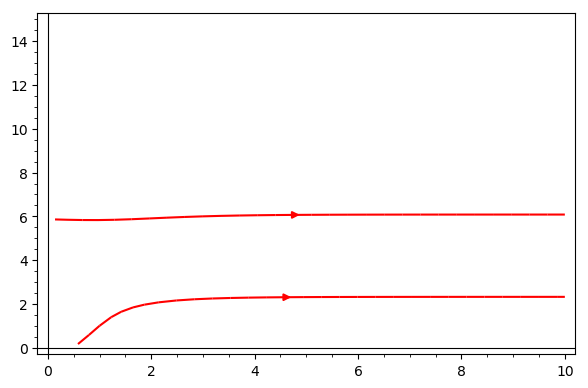

In [64]:
fluxo2 = streamline_plot(sol_T.subs(v=1,k_n=1,u_0=3,u_ell=1,ell=15), (t,0,10), (x,0,15), start_points=[[1, 1],[3,6]], color='red');fluxo2

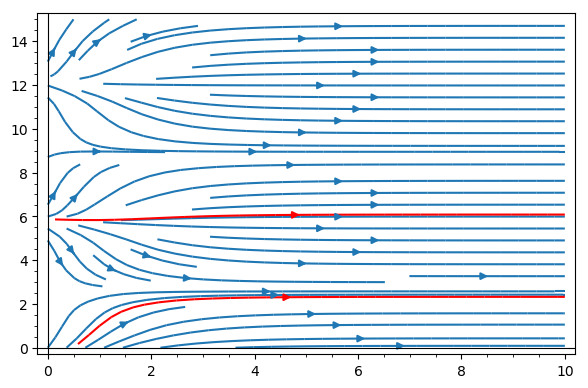

In [65]:
fluxo1+fluxo2

### 2.3 Sistema de EDO's lineares

$$\begin{cases}
y'(x) = A\cdot y\\
y(0) = c
\end{cases}$$

In [66]:
y_1 = function('y_1')(x); y_2 = function('y_2')(x); y_3 = function('y_3')(x)
y = vector([y_1, y_2, y_3])
A = matrix([[2,-2,1],[-1,0,2],[0,2,1]])
c = [2,1,-2]
system = list(diff(y, x)-A*y)

In [67]:
for k in range(3): display(system[k]==c[k])

-2*y_1(x) + 2*y_2(x) - y_3(x) + diff(y_1(x), x) == 2

y_1(x) - 2*y_3(x) + diff(y_2(x), x) == 1

-2*y_2(x) - y_3(x) + diff(y_3(x), x) == -2

In [68]:
sol_sistema = desolve_system(system, y, ics=[0]+c)

In [69]:
for eq in sol_sistema: display(eq)

y_1(x) == 4/5*e^(3*x) + 6/5*e^(-2*x)

y_2(x) == -4/5*e^(3*x) + 9/5*e^(-2*x)

y_3(x) == -4/5*e^(3*x) - 6/5*e^(-2*x)

## 3. Animação e interação

Animações são criadas com listas de gráficos. Cada gráfico representando um frame.

Animation with 41 frames
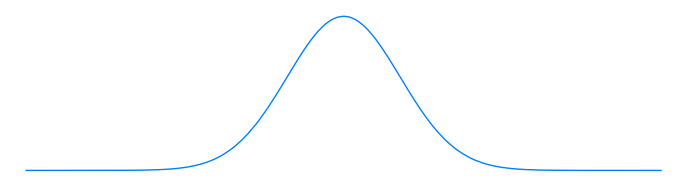

In [70]:
animate( [ plot( (1-abs(t))*cos(x)+abs(t)*exp(-x**2/10), x, -4*pi, 4*pi,
                       figsize=[7,2], color=(0,.5,1),axes=False )
               for t in sxrange(-1,1.01,.05) ] )

Existem também algumas opções de construção de objetos interativos combinado o `@interact` do jupyter e funções do sage.

In [ ]:
from sage.plot.plot3d.shapes import *

In [71]:
@interact
def kerr_Interact(
    dim = selector(values = ["2D", "3D"],                  
    label = "Dimensão: ",default = "2D" ),
    a = slider(vmin=0, vmax=1, step_size=.05,
    default=.0, label="a: ")):
    m0 = 1
    r_h = m0-sqrt(m0**2-a**2)
    r_H = m0+sqrt(m0**2-a**2)
    r_e = m0+sqrt(m0**2-a**2*sin(u)**2)
    if dim == "2D":
        plt = polar_plot(r_e,u,-pi,pi,color='red')+circle((0,0), r_H,fill=True,color=(0,102/256,204/256))+circle((0,0),r_h,fill=True,color='black')
        plt.show(axes=False)
    else:
        plt = revolution_plot3d((r_e*cos(u),r_e*sin(u)), (u,-pi,pi), show_curve=True, opacity=0,mesh=True)
        plt+= Sphere(r_h, color='black')
        plt+= Sphere(r_H, color=(0,102/256,204/256),alpha=.6)
        plt.show(frame=False)

NameError: name 'interact' is not defined

## 4. SageManifold

A classe manifold vem com algumas variedades pré-definidos. São Elas:

* Sphere
* Torus
* Minkowski
* Kerr

Vejamos inicialmente o Toro.

### 4.1 Toro

Varemos como obter:  

   * A parametrização $T(\theta,\phi)=\left((R+r\cos \theta)\cos \phi,(R+r\cos \theta)\sin \phi, r\sin \theta\right)$;

   *  A métrica $g_{ij}$;

   *  A área do Toro;

   * Os símbolos de Christoffel $\Gamma^i_{\;jk}$;

   * As componentes do tensor de Riemann e escalar de Ricci;

   * As geodésicas.

In [72]:
T.<theta, phi> = manifolds.Torus(2.5, 1)
print(T)

2-dimensional Riemannian submanifold T embedded in the Euclidean space E^3


A parametrização no espaço euclidiano já vem pré-definida

In [73]:
T.embedding().display()

T --> E^3
   (theta, phi) |--> (X, Y, Z) = ((cos(theta) + 2.50000000000000)*cos(phi), (cos(theta) + 2.50000000000000)*sin(phi), sin(theta))

In [74]:
toro=T.plot({},srange(0,2*pi+.2,.1),srange(0,2*pi+.2,.1),color='gray',mesh=True,alpha=.5,frame=False)
toro

Graphics3d Object

#### 4.1.1 Métrica

A métrica também já vem pré-definida.

In [75]:
T.metric().display()

gamma = dtheta*dtheta + (cos(theta)^2 + 5*cos(theta) + 25/4) dphi*dphi

O que permite calcular diretamente a área.

$$A_T = \iint_T \sqrt{\gamma}\,d\phi\, d\theta$$

In [76]:
T.metric().det().expr().factor().sqrt().simplify().integrate(theta,0,2*pi).integrate(phi,0,2*pi)

10*pi^2

Os símbolos de Christofell.

In [77]:
T.metric().christoffel_symbols_display()

Gam^theta_phi,phi = 1/2*(2*cos(theta) + 5)*sin(theta) 
Gam^phi_theta,phi = -2*sin(theta)/(2*cos(theta) + 5)

E a curvatura.

In [78]:
T.metric().riemann().display_comp()

Riem(gamma)^theta_phi,theta,phi = cos(theta)^2 + 5/2*cos(theta) 
Riem(gamma)^theta_phi,phi,theta = -cos(theta)^2 - 5/2*cos(theta) 
Riem(gamma)^phi_theta,theta,phi = 2*(2*sin(theta)^2 - 5*cos(theta) - 2)/(4*cos(theta)^2 + 20*cos(theta) + 25) 
Riem(gamma)^phi_theta,phi,theta = 2*cos(theta)/(2*cos(theta) + 5)

In [79]:
T.metric().ricci_scalar().display()

r(gamma): T --> R
   (theta, phi) |--> 4*cos(theta)/(2*cos(theta) + 5)

#### 4.1.2 Espaço tangente

Fixamos um ponto a partir do qual definiremos o espaço tangente

In [90]:
p=T.point((pi/3,pi/3), name='p')
print(p)
p

Point p on the 2-dimensional Riemannian submanifold T embedded in the Euclidean space E^3


Point p on the 2-dimensional Riemannian submanifold T embedded in the Euclidean space E^3

In [91]:
Tp=T.tangent_space(p)
print(Tp)

Tangent space at Point p on the 2-dimensional Riemannian submanifold T embedded in the Euclidean space E^3


In [82]:
Tp.bases()

[Basis (d/dtheta,d/dphi) on the Tangent space at Point p on the 2-dimensional Riemannian submanifold T embedded in the Euclidean space E^3]

In [92]:
v=Tp((1,2),name='v')
print(v)

Tangent vector v at Point p on the 2-dimensional Riemannian submanifold T embedded in the Euclidean space E^3


In [93]:
v.display()

v = d/dtheta + 2 d/dphi

$\gamma\left|_{p}(v,v)\right. = \gamma_{\mu\nu}v^\mu v^\nu$

In [94]:
T.metric().at(p)(v,v) 

37

#### 4.1.3 Geodésicas

Vamos agora usar a integração numérica de geodésicas implementada no Sage.

Primeiro iniciamos a geodésica

In [95]:
var('tau')
geo=T.integrated_geodesic(T.metric(), (tau,0,20),v,name='geo')

Resolve

In [96]:
sol = geo.solve()

Interpola

In [97]:
interp = geo.interpolate()

E podemos então plotar

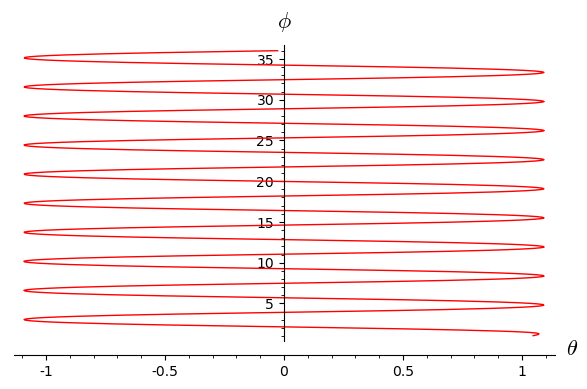

In [89]:
geo.plot_integrated(plot_points=500)

Uma possibilidade mais interessante é plotar em $\mathbb{E}^3$ usando a parametrização.

In [98]:
T.embedding().display()

T --> E^3
   (theta, phi) |--> (X, Y, Z) = ((cos(theta) + 2.50000000000000)*cos(phi), (cos(theta) + 2.50000000000000)*sin(phi), sin(theta))

In [99]:
pgeo=geo.plot_integrated(mapping=T.embedding(),thickness=2,plot_points=500)
pgeo

Graphics3d Object

Adicionamos vetores tangentes com a opção `display_tangent=True`

In [100]:
pgeot=geo.plot_integrated(mapping=T.embedding(),thickness=2,plot_points=500,display_tangent=True,plot_points_tangent=50,scale=.12)
pgeot  

Graphics3d Object

In [101]:
toro+pgeot

Graphics3d Object

## 4.2 Solução de Schwarzschild

Primeiro precisamos contruir o espaço-tempo de Schwarschild

In [102]:
M = Manifold(4, 'M', structure='Lorentzian')

In [103]:
SD.<t, r, th, ph> = M.chart(r"t r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi:periodic")

In [104]:
SD.coord_range()

t: (-oo, +oo); r: (0, +oo); th: (0, pi); ph: [0, 2*pi] (periodic)

### 4.2.1 Métrica

In [105]:
var('m')
g = M.metric()
g[0, 0] = - (1 - 2*m/r)
g[1, 1] = 1/(1 - 2*m/r)
g[2, 2] = r^2
g[3, 3] = r^2*sin(th)^2

In [106]:
g.display()

g = (2*m/r - 1) dt*dt - 1/(2*m/r - 1) dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

In [107]:
g.display_comp()

g_t,t = 2*m/r - 1 
g_r,r = -1/(2*m/r - 1) 
g_th,th = r^2 
g_ph,ph = r^2*sin(th)^2

### 4.2.2 Conexão de Levi-Civita

In [108]:
nabla = g.connection()
print(nabla)

Levi-Civita connection nabla_g associated with the Lorentzian metric g on the 4-dimensional Lorentzian manifold M


In [109]:
nabla(g).display()

nabla_g(g) = 0

In [110]:
nabla.display()

Gam^t_t,r = -m/(2*m*r - r^2) 
Gam^t_r,t = -m/(2*m*r - r^2) 
Gam^r_t,t = -(2*m^2 - m*r)/r^3 
Gam^r_r,r = m/(2*m*r - r^2) 
Gam^r_th,th = 2*m - r 
Gam^r_ph,ph = (2*m - r)*sin(th)^2 
Gam^th_r,th = 1/r 
Gam^th_th,r = 1/r 
Gam^th_ph,ph = -cos(th)*sin(th) 
Gam^ph_r,ph = 1/r 
Gam^ph_th,ph = cos(th)/sin(th) 
Gam^ph_ph,r = 1/r 
Gam^ph_ph,th = cos(th)/sin(th)

In [111]:
k = M.vector_field(1, -1, 0, 0, name='k')
k.display()

k = d/dt - d/dr

In [112]:
nabla(k).display_comp()

nabla_g(k)^t_t = m/(2*m*r - r^2) 
nabla_g(k)^t_r = -m/(2*m*r - r^2) 
nabla_g(k)^r_t = -(2*m^2 - m*r)/r^3 
nabla_g(k)^r_r = -m/(2*m*r - r^2) 
nabla_g(k)^th_th = -1/r 
nabla_g(k)^ph_ph = -1/r

In [113]:
nabla(k).down(g,0).display_comp()

X_t,t = m/r^2 
X_t,r = -m/r^2 
X_r,t = m/r^2 
X_r,r = m/(4*m^2 - 4*m*r + r^2) 
X_th,th = -r 
X_ph,ph = -r*sin(th)^2

### 4.2.3 Curvatura

Tensor de Riemann

In [114]:
Riem = g.riemann()
print(Riem)

Tensor field Riem(g) of type (1,3) on the 4-dimensional Lorentzian manifold M


In [115]:
Riem.display_comp(only_nonredundant=True)

Riem(g)^t_r,t,r = -2*m/(2*m*r^2 - r^3) 
Riem(g)^t_th,t,th = -m/r 
Riem(g)^t_ph,t,ph = -m*sin(th)^2/r 
Riem(g)^r_t,t,r = -2*(2*m^2 - m*r)/r^4 
Riem(g)^r_th,r,th = -m/r 
Riem(g)^r_ph,r,ph = -m*sin(th)^2/r 
Riem(g)^th_t,t,th = (2*m^2 - m*r)/r^4 
Riem(g)^th_r,r,th = -m/(2*m*r^2 - r^3) 
Riem(g)^th_ph,th,ph = 2*m*sin(th)^2/r 
Riem(g)^ph_t,t,ph = (2*m^2 - m*r)/r^4 
Riem(g)^ph_r,r,ph = -m/(2*m*r^2 - r^3) 
Riem(g)^ph_th,th,ph = -2*m/r

In [116]:
Riem[0,1,0,1]

-2*m/(2*m*r^2 - r^3)

Tensor de Ricci

In [117]:
g.ricci().display()

Ric(g) = 0

Tensor de Weyl

In [118]:
g.weyl().display_comp(only_nonredundant=True)

C(g)^t_r,t,r = -2*m/(2*m*r^2 - r^3) 
C(g)^t_th,t,th = -m/r 
C(g)^t_ph,t,ph = -m*sin(th)^2/r 
C(g)^r_t,t,r = -2*(2*m^2 - m*r)/r^4 
C(g)^r_th,r,th = -m/r 
C(g)^r_ph,r,ph = -m*sin(th)^2/r 
C(g)^th_t,t,th = (2*m^2 - m*r)/r^4 
C(g)^th_r,r,th = -m/(2*m*r^2 - r^3) 
C(g)^th_ph,th,ph = 2*m*sin(th)^2/r 
C(g)^ph_t,t,ph = (2*m^2 - m*r)/r^4 
C(g)^ph_r,r,ph = -m/(2*m*r^2 - r^3) 
C(g)^ph_th,th,ph = -2*m/r

Escalar de Kretschmann

In [119]:
K = Riem.down(g)['_{abcd}'] * Riem.up(g)['^{abcd}']
print(K)
K.display()

Scalar field on the 4-dimensional Lorentzian manifold M


M --> R
(t, r, th, ph) |--> 48*m^2/r^6

### 4.2.4 Geodésicas

Espaço Euclidiano

In [120]:
E3.<x,y,z> = EuclideanSpace()
X3 = E3.cartesian_coordinates()
to_E3 = M.diff_map(E3, {(SD, X3): 
                        [r*sin(th)*cos(ph), r*sin(th)*sin(ph), r*cos(th)]})
to_E3.display()

M --> E^3
   (t, r, th, ph) |--> (x, y, z) = (r*cos(ph)*sin(th), r*sin(ph)*sin(th), r*cos(th))

Vetor tangente

In [121]:
p = M((m, 8*m, pi/2, 0), name='p')
v0 = M.tangent_space(p)((1.3, 0, 0, 0.064/m), name='v_0')
v0.display()

v_0 = 1.30000000000000 d/dt + 0.0640000000000000/m d/dph

Integração numérica de geodésicas

In [122]:
s = var('s')
geod = M.integrated_geodesic(g, (s, 0, 2000), v0)
geod

Integrated geodesic in the 4-dimensional Lorentzian manifold M

In [123]:
sol = geod.solve(parameters_values={m: 1})
interp = geod.interpolate() 

In [124]:
geod.plot_integrated(chart=X3, mapping=to_E3, plot_points=1000, 
                     thickness=2, label_axes=False) \
+ p.plot(chart=X3, mapping=to_E3, size=20, parameters={m: 1}) \
+ sphere(size=2, color='grey')

Graphics3d Object

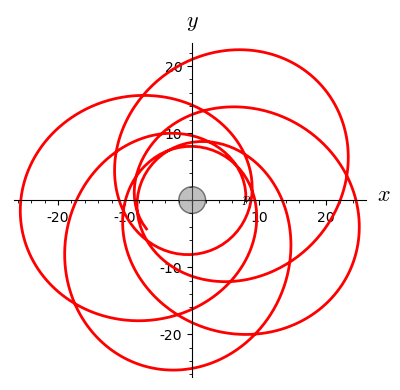

In [125]:
bh_plot = circle((0, 0), 2, edgecolor='black', fill=True, facecolor='grey', alpha=0.5)
geod.plot_integrated(chart=X3, mapping=to_E3, ambient_coords=(x,y), plot_points=1000, 
                     thickness=2) \
+ p.plot(chart=X3, mapping=to_E3, ambient_coords=(x,y), size=4, parameters={m: 1}) \
+ bh_plot

### 4.2.5 Órbitas em geodésicas nulas

In [127]:
def initial_vector(r0, b, phi0=0, inward=True):
    r"""
    Evaluate the initial tangent vector along a null geodesic. 
    
    INPUT:
    
    - r0: radial SD coordinate of the initial point
    - b: impact parameter
    - phi0: azimuthal SD coordinate of the initial point (default: 0)
    - inward: determines whether the geodesic has initially v^r < 0 (default: True)
    
    """
    vt0 = 1/(1 - 2*m/r0)
    vr0 = sqrt(1 - b^2/r0^2*(1 - 2*m/r0))
    if inward:
        vr0 = - vr0
    vth0 = 0
    vph0 = b / r0^2
    p0 = M((0, r0, pi/2, phi0), name='p_0')  # initial point
    return M.tangent_space(p0)((vt0, vr0, vth0, vph0), name='v_0')

#### 4.2.5.1 Desvio

In [128]:
v0 = initial_vector(10*m, 7*m)
v0.display()

v_0 = 5/4 d/dt - 2/5*sqrt(19/5) d/dr + 7/100/m d/dph

Vetor tangente do tipo luz

In [129]:
p0 = v0.parent().base_point()
g.at(p0)(v0, v0)

0

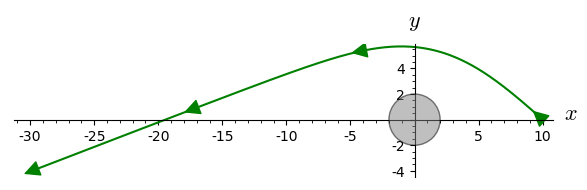

In [130]:
geod = M.integrated_geodesic(g, (s, 0, 40), v0)
sol = geod.solve(step=0.01, parameters_values={m: 1}) 
interp = geod.interpolate()   
plot2 = geod.plot_integrated(chart=X3, mapping=to_E3, ambient_coords=(x,y), 
                             plot_points=500, color='green', thickness=1.5, display_tangent=True, 
                             color_tangent='green', plot_points_tangent=4, scale=1) 
plot2 += bh_plot
plot2

#### 4.2.5.2 Mergulho

In [131]:
v0 = initial_vector(10*m, 5*m)
v0.display()

v_0 = 5/4 d/dt - 2*sqrt(1/5) d/dr + 1/20/m d/dph

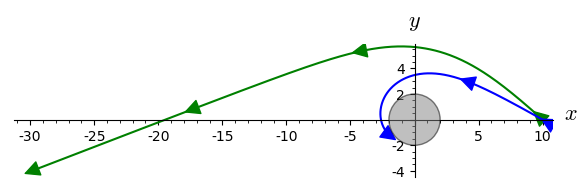

In [132]:
geod = M.integrated_geodesic(g, (s, 0, 13), v0)
sol = geod.solve(step=0.01, parameters_values={m: 1}) 
interp = geod.interpolate()   
plot2 += geod.plot_integrated(chart=X3, mapping=to_E3, ambient_coords=(x,y), 
                              plot_points=500, color='blue', thickness=1.5, display_tangent=True, 
                              color_tangent='blue', plot_points_tangent=3, scale=0.2)
plot2

#### 4.2.5.3 Órbita circular

In [133]:
v0 = initial_vector(3*m, 3*sqrt(3)*m)
v0.display()

v_0 = 3 d/dt + 1/3*sqrt(3)/m d/dph

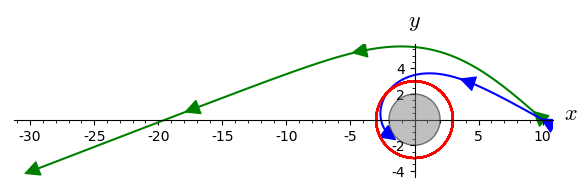

In [134]:
geod = M.integrated_geodesic(g, (s, 0, 100), v0)
sol = geod.solve(step=0.01, parameters_values={m: 1}) 
interp = geod.interpolate()   
plot2 += geod.plot_integrated(chart=X3, mapping=to_E3, ambient_coords=(x,y), 
                              plot_points=500, color='red', thickness=1.5)
plot2

#### 4.2.5.4 Grande desvio

In [135]:
v0 = initial_vector(10*m, 5.2025*m)

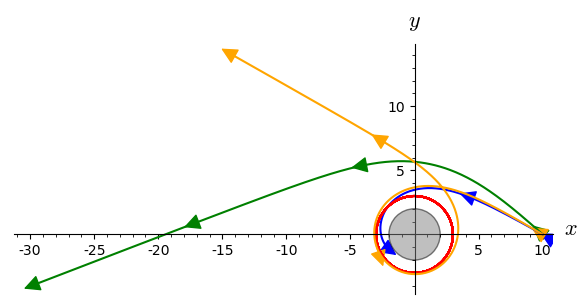

In [136]:
geod = M.integrated_geodesic(g, (s, 0, 40), v0)
sol = geod.solve(step=0.01, parameters_values={m: 1}) 
interp = geod.interpolate()   
plot2 += geod.plot_integrated(chart=X3, mapping=to_E3, ambient_coords=(x,y), 
                              plot_points=500, color='orange', thickness=1.5,
                              display_tangent=True, color_tangent='orange', 
                              plot_points_tangent=4, scale=1)
plot2

## 4.3 Tensor de Weyl e simetria conforme

In [150]:
gw = M.metric()
gw.set_name('gw')

In [144]:
Omg = function('Omega')(t,r,th,ph)

In [145]:
gw = Omg^2*g

In [152]:
gw.display()

gw = (2*m/r - 1) dt*dt - 1/(2*m/r - 1) dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

In [153]:
g.weyl() == gw.weyl()

True